In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
xx = np.array([-0.51, 51.2])
yy = np.array([0.33, 51.6])
means = [xx.mean(), yy.mean()]  
stds = [xx.std() / 3, yy.std() / 3]
corr = 0.8         # correlation
covs = [[stds[0]**2          , stds[0]*stds[1]*corr], 
        [stds[0]*stds[1]*corr,           stds[1]**2]] 

m = np.random.multivariate_normal(means, covs, 1000).T

In [3]:
df=pd.DataFrame()

In [4]:
df['exp(in months)']=m[0]
df['salary(in thousands)']=m[1]

In [5]:
df.head()

,exp(in months),salary(in thousands)
0,32.303606,37.193774
1,27.483409,28.811814
2,37.424579,25.187813
3,24.442922,17.214016
4,30.075419,30.719296


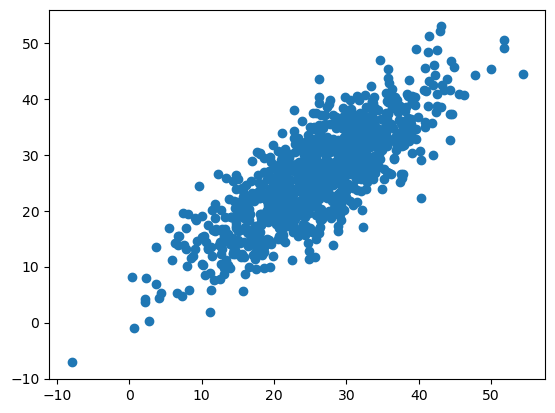

In [6]:
plt.scatter(df['exp(in months)'],df['salary(in thousands)'])

In [7]:
X=df.iloc[:,0:1].values
y=df.iloc[:,1].values
print(X.shape)
print(y.shape)

(1000, 1)
(1000,)


In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [9]:
print(X_train.shape)
print(X_test.shape)

(800, 1)
(200, 1)


In [10]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

In [11]:
linear.fit(X_train,y_train)

LinearRegression()

In [12]:
y_pred = linear.predict(X_test)

In [13]:
# Finding the Coefs and intercept

# Equation of line is given by y=mx+b
# y=0.81*x + 5.50
# m ---> slope
# b ---> intercept

# X coefficient
print(linear.coef_[0])

# Y intercept
print(linear.intercept_)

0.8344836051524989
4.874326084560632


In [15]:
df_error=pd.DataFrame()
df_error['y_test']=y_test
df_error['y_pred']=y_pred
df_error.shape

(200, 2)

In [17]:
df_error.head()

,y_test,y_pred
0,13.456618,14.262608
1,27.805127,33.645508
2,12.653624,20.389301
3,41.596779,41.138643
4,31.815913,21.415499


In [24]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

3.6902115574422636

In [27]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

21.848463598780636

In [28]:
# Root Mean Squared Error
mse=mean_squared_error(y_test,y_pred)

np.sqrt(mse)

4.6742340119832075

In [29]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6501749383815663

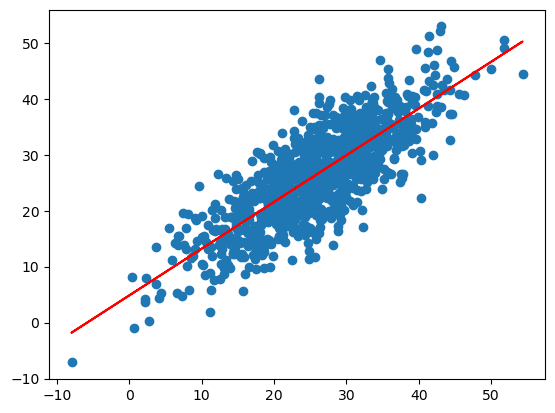

In [30]:
# Visualising the regression line
plt.plot(X_train,linear.predict(X_train), color='red')
plt.scatter(df['exp(in months)'],df['salary(in thousands)'])

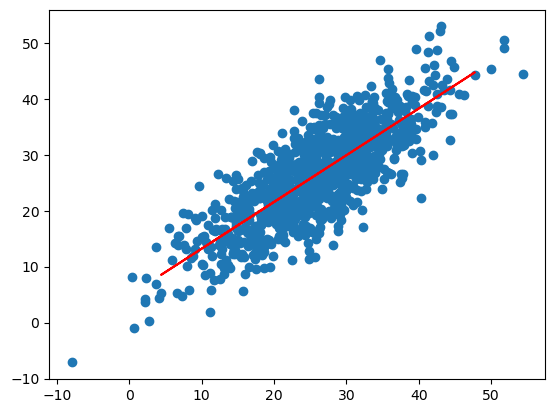

In [31]:
# Visualising the regression line
plt.plot(X_test,linear.predict(X_test), color='red')
plt.scatter(df['exp(in months)'],df['salary(in thousands)'])